<h3><center>Clase ejercicios 01 - IMA539.</center></h3>
<center>Camilo Calfucoy, Jorge Ruíz</center>

<center>Departamento de Ingeniería Matemática</center>

<center>Agosto 26, 2024.</center>


# **Análisis de la Pérdida de Clientes en un Banco Multinacional**

## **Contexto**

En este proyecto, utilizaremos un conjunto de datos denominado ``"Bank Customer Churn Prediction.csv"`` de un banco multinacional (ABC Multistate Bank) para predecir la pérdida de clientes, comúnmente conocida como *churn* en inglés. La pérdida de clientes es un problema crítico en la industria bancaria, ya que adquirir nuevos clientes suele ser más costoso que retener a los existentes. Por lo tanto, predecir qué clientes tienen más probabilidades de dejar el banco puede ayudar a implementar estrategias de retención más efectivas.

## **Descripción del Conjunto de Datos**

El conjunto de datos contiene información sobre los clientes del banco, con un total de 12 variables, descritas a continuación:

- `customer_id`: Identificador único de cada cliente (variable no utilizada en el análisis).
- `credit_score`: Puntaje crediticio del cliente, usado como una medida de riesgo.
- `country`: País de residencia del cliente.
- `gender`: Género del cliente.
- `age`: Edad del cliente.
- `tenure`: Tiempo que el cliente ha estado con el banco (en años).
- `balance`: Saldo actual en la cuenta del cliente.
- `products_number`: Número de productos bancarios contratados por el cliente.
- `credit_card`: Indica si el cliente tiene una tarjeta de crédito con el banco (1 para sí, 0 para no).
- `active_member`: Indica si el cliente es un miembro activo (1 para sí, 0 para no).
- `estimated_salary`: Salario estimado del cliente.
- `churn`: Variable objetivo que indica si el cliente ha dejado el banco (1 para sí, 0 para no).


## Ejercicios propuestos:

1. Menciona un objetivo que se podría plantear al realizar un análisis en esta base de datos (`Bank Customer Churn Prediction.csv`).


In [1]:
# Se podria intentar generar una identificacion por:
#     Pais
#     Genero
#     Churn

2. Cargue el archivo `Bank Customer Churn Prediction.csv` en un DataFrame utilizando Pandas.

In [2]:
import pandas as pd

df = pd.read_csv('Data_Ayudantía_1/Bank Customer Churn Prediction.csv')
df.describe(include="all")
# df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


3. Realice un análisis exploratorio de los datos. Identifique variables numéricas y categóricas, y comente las principales características estadísticas.

In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


(10000, 12)

4. Cree un dataframe eliminando las columnas que no aportan al análisis (mantenga las variables continuas).

In [4]:
df=df.drop(columns=["customer_id","gender","country","tenure","products_number","credit_card","active_member"])
df

,credit_score,age,balance,estimated_salary,churn
0,619,42,0.00,101348.88,1
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,1
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0
...,...,...,...,...,...
9995,771,39,0.00,96270.64,0
9996,516,35,57369.61,101699.77,0
9997,709,36,0.00,42085.58,1
9998,772,42,75075.31,92888.52,1


5. Encuentre dos variables en las que las clases no sean linealmente separables.

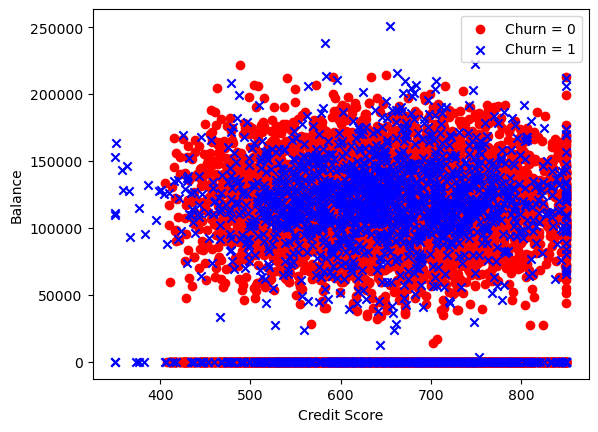

In [5]:
import matplotlib.pyplot as plt
name_clases = ["Churn = 0", "Churn = 1"]
variable_names = ["Credit Score", "Balance"]

churnOne=df[(df["churn"]==1)]
churnCero=df[(df["churn"]==0)]
X = df.iloc[:,[0,2]].values
y = df.iloc[:10000,4].values
plt.scatter(churnCero["credit_score"], churnCero["balance"], color='red', marker='o', label=name_clases[0])
plt.scatter(churnOne["credit_score"], churnOne["balance"], color='blue', marker='x', label=name_clases[1])
plt.xlabel(f'{variable_names[0]}')
plt.ylabel(f'{variable_names[1]}')
plt.legend(loc='upper right')
plt.show()


6. Plotee las dos variables seleccionadas en un gráfico de dispersión, coloreando los puntos según la clase.

In [6]:
import numpy as np
y.shape
y_numeric = np.where(y == 1, 1, -1)
print(y_numeric)

[ 1 -1  1 ...  1  1 -1]


7. Cree un conjunto de entrenamiento utilizando el 70% de los datos y un 30% para el conjunto de testeo. Verifique el balance de clases en ambos conjuntos.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(y_train)
y_numeric_train = np.where(y_train == 1, 1, -1)
print(y_numeric_train)



[0 0 0 ... 1 0 0]
[-1 -1 -1 ...  1 -1 -1]


8. Corra el algoritmo Perceptron con 10 iteraciones sobre el conjunto de entrenamiento.

In [8]:
class Perceptron(object):
    """ Perceptron classifier.
    Parametros
    ------------
    eta : float
    Learning rate (entre 0.0 y 1.0)
    n_iter : int
    Cantidad de épocas de entrenamiento.
    random_state : int
    Semilla del generador de números aleatorios para
    la inicialización de pesos aleatorios.
    Atributos
    -----------
    w_ : 1d-array
    Vector de peso después del entrenamiento.
    errors_ : list
    Número de clasificaciones erróneas (actualizaciones) en cada época.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """Entrenamiento.
        Parametros
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Vector de entrenamiento, donde n_samples es el número de muestras y
        n_features es el número de características.
        y : array-like, shape = [n_samples]
        Valor de salida.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        """Calcular entrada neta, z"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        """Etiqueta de clase después del paso unitario"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [9]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_train, y_numeric_train)
for i in range(len(ppn.w_)):
    print('w[{}] = {}'.format(i,ppn.w_[i]))


w[0] = 29.61624345363656
w[1] = -87.60611756414282
w[2] = 11034.322718283165


9. Utilice la función `plot_decision_regions()` para visualizar la frontera de decisión obtenida por el Perceptron.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, plot_object,
                          test_idx=None,only_train=False, only_test=False,
                          clases_names=['clase 0','clase 1'],resolution=0.95):
    markers = ('s', 'o', '^', 'v', 'x')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
 
 
    plot_object.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
 
    if not(only_test):
        for idx, cl in enumerate(np.unique(y)):
            plot_object.scatter(x=X[y == cl, 0],y=X[y == cl, 1],
                                alpha=0.8,c=colors[idx],
                                marker=markers[idx],label=clases_names[idx],
                                edgecolor='black')
    if not(test_idx is None) and not(only_train):
        X_test, y_test = X[test_idx, :], y[test_idx]
        for idx, cl in enumerate(np.unique(y_test)):
            plot_object.scatter(x=X_test[y_test == cl, 0],
                                y=X_test[y_test == cl, 1],
                                alpha=0.8,c=colors[idx],marker=markers[idx],
                                label=clases_names[idx],edgecolor='black')

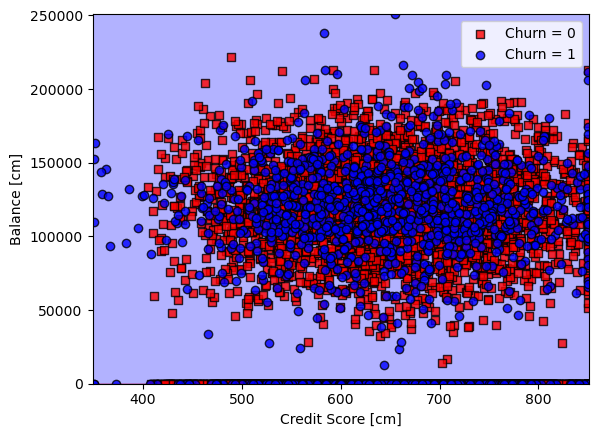

In [11]:
plot_decision_regions(X_train, y_numeric_train, classifier=ppn,clases_names=name_clases, plot_object=plt)
plt.xlabel(f'{variable_names[0]} [cm]')
plt.ylabel(f'{variable_names[1]} [cm]')
plt.legend(loc='upper right')
#plt.savefig('02_

10. Implemente dos funciones en la clase `AdalineSGD`: una que imprima en pantalla los pesos actuales y otra que imprima el costo cuadrado promedio asociado a un conjunto de datos. Pruebe las funciones implementadas.

11. Entrene el modelo de manera sucesiva `AdalineSGD` y comparando el cambio de los pesos y el avance de los costos utilizando `partial_fit` para 5, 6, 7, 8, 9 y 10 iteraciones.

12. Entrene un modelo de regresión logística utilizando la implementación `LogisticRegressionGD`.

13. Identifique las observaciones que fueron erróneamente clasificadas por el modelo en el conjunto de entrenamiento.

14. Estudiar si todos los datos de testeo son bien identificados por la implementación de `LogisticRegression` de Sklearn.

15. Modifique la implementación de `LogisticRegressionGD` para incorporar regularización L2. Evalúe el impacto de la regularización sobre el desempeño del modelo en términos de precisión y sobreajuste.

In [12]:
log_reg = LogisticRegressionGD(eta=0.05, n_iter=100, random_state=1, l2=0.1)
log_reg.fit(X_train_std, y_train)
y_train_pred = log_reg.predict(X_train_std)
err_classified = (y_train != y_train_pred).sum()
print(f'Número de observaciones erróneamente clasificadas: {err_classified}')

NameError: name 'LogisticRegressionGD' is not defined

16. Reflexione sobre los resultados obtenidos. ¿Qué aspectos del preprocesamiento, selección de variables o regularización fueron más influyentes en la calidad del modelo?